In [1]:
import sys
sys.path.insert(0, "/Users/nicoladilillo/Projects_mac/lettuce_spectral_signature")
from cars_model import CARS
import os

In [2]:
# extract the name of the file
col_group = ['Date', 'Class', 'Stress_weight', 'Position']
file_name = '10_SG_SVN/GA-iPLS'
path = os.path.join(os.path.abspath(os.getcwd()), file_name)
c = CARS(path, MAX_COMPONENTS=10, col_group=col_group, calibration=False, cutoff=0.5)

Training samples: 157
	Class Healty: 82 samples
	Class Unhealty: 75 samples
Testing samples: 39
	Class Healty: 20 samples
	Class Unhealty: 19 samples


In [3]:
w = c.compute_survived_wavelengths_best_score_single()
c.plot_survived_df

Best accuracy for run 83 and iteration 33
Best accuracy = 0.9230769230769232


,Wavelengths,count
0,400.000,0.0
1,401.000,0.0
2,402.000,0.0
3,403.000,0.0
4,404.000,0.0
...,...,...
2096,2496.000,0.0
2097,2497.000,0.0
2098,2498.000,0.0
2099,2499.000,0.0


['1000.000', '1001.000', '1002.000', '1003.000', '1004.000', '1005.000', '1006.000', '1007.000', '1008.000', '1030.000', '1031.000', '1032.000', '1033.000', '1034.000', '1035.000', '1036.000', '1037.000', '1038.000', '1039.000', '1040.000', '1041.000', '1042.000', '1043.000', '1044.000', '1045.000', '1046.000', '1047.000', '1048.000', '1049.000', '1050.000', '1051.000', '1052.000', '1053.000', '1054.000', '1055.000', '1056.000', '1057.000', '1058.000', '1059.000', '1060.000', '1061.000', '1062.000', '1063.000', '1064.000', '1065.000', '1066.000', '1067.000', '1068.000', '1069.000', '1070.000', '1071.000', '1072.000', '1073.000', '1074.000', '1075.000', '1076.000', '1077.000', '1078.000', '1079.000', '1080.000', '1081.000', '1082.000', '1083.000', '1084.000', '1085.000', '1086.000', '1087.000', '1088.000', '1089.000', '1090.000', '1091.000', '1092.000', '1093.000', '1094.000', '1095.000', '1096.000', '1097.000', '1098.000', '1099.000', '1100.000', '1101.000', '1102.000', '1103.000', '11

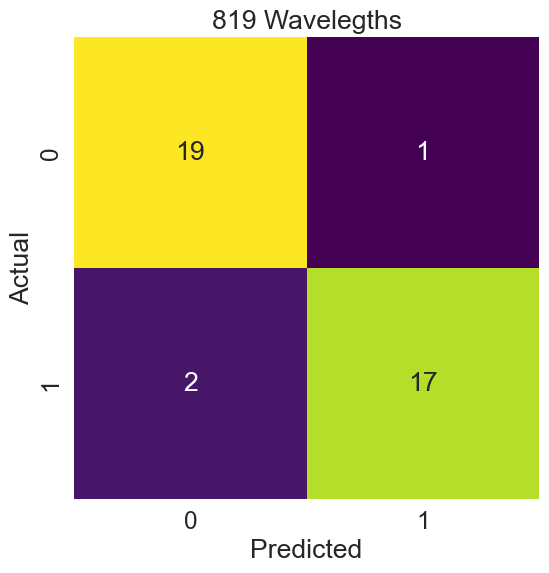

In [5]:
a, l, y_pred = c.accuracy_survived_wavelenghts(thr=None, rdm=False, all=False, model_type='PLS', wavelengths=[w], learning_curve=False, pls_plot=False, peak_detection=False, confusion_matrix_f=True)

In [6]:
# for i in l:
#     print(len(i))
#     c.permutation_test(wavelengths=i)

In [7]:
import numpy as np
import pandas as pd

# Step 1 & 2: Find indices where predictions differ from true values
diff_indices = np.where(y_pred != c.y_test_2.flatten())[0]
# print(diff_indices)

# Step 3: Extract corresponding rows from c.df_test_2
diff_rows = c.df_test_2.iloc[diff_indices]

# Step 4: Filter rows where class is 'Uhealty'
stress_rows = diff_rows[diff_rows.index.get_level_values('Class') == 'Unhealty']

# Step : Extract 'Stress_weight' column
stress_weights = diff_rows.index.get_level_values('Stress_weight')

# If you want to print or return the results
print("Mismatched:", diff_rows.index.tolist())
print("Corresponding Stress_weight values:\n", stress_weights)

Mismatched: [('20-Jun-2023', 'Healty', 40, 97), ('17-May-2023', 'Unhealty', 20, 46), ('17-May-2023', 'Unhealty', 20, 51)]
Corresponding Stress_weight values:
 Index([40, 20, 20], dtype='int64', name='Stress_weight')
